In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_dlim_lsa.csv")

In [3]:
df_mlp

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..D-Limonene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.341772
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.341772
2,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.341772
3,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.341772
4,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.341772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.240506
74996,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.240506
74997,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.240506
74998,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.240506


In [4]:
df_mlp.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

In [5]:
X = df_mlp.drop(['index', 'X..D-Limonene'], axis = 1)
y = df_mlp[['X..D-Limonene']]

<AxesSubplot:ylabel='Count'>

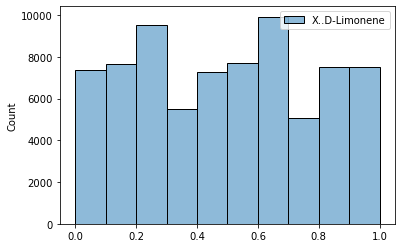

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.14736417941795255

In [11]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.6545273276431369

In [12]:
#val
r2_score(y_val, y_pred_mlp)

0.5262302470231929

Residual plots for each target variable

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([1.05536882e-01, 9.10285777e-02, 9.77851847e-02, 9.78090953e-02,
       9.91895630e-02, 4.22190231e-02, 2.40016329e-02, 9.93037520e-03,
       4.13890973e-04, 2.99046642e-03, 5.35444048e-03, 3.02260906e-07,
       7.62116986e-03, 3.41770990e-04, 3.95872252e-03, 5.34363138e-03,
       8.16702745e-03, 6.65763110e-03, 6.66909919e-08, 9.13936336e-03,
       8.91285678e-08, 3.35862351e-10, 8.14812772e-03, 6.16979026e-03,
       8.44585279e-03, 2.70409367e-03, 8.16090947e-03, 5.40755301e-04,
       5.02669032e-09, 3.24037067e-03, 9.44198638e-03, 5.15931262e-08,
       5.92560897e-03, 1.14172052e-08, 5.46359668e-07, 5.91001310e-03,
       7.88568684e-03, 7.98992262e-03, 4.01757904e-04, 1.80967595e-04,
       1.73788655e-04, 5.92296831e-03, 7.15172100e-05, 9.80040814e-03,
       3.50307405e-03, 3.71140357e-03, 1.69126321e-03, 1.49967556e-04,
       1.27476993e-02, 2.29148876e-03, 1.48589141e-01, 1.00468314e-02,
       2.82790320e-03, 2.34956518e-03, 7.23408104e-03, 1.35161447e-03,
      

In [16]:
selector.threshold_

0.011627906976744184

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,citrus,diesel
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0
3,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0
4,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0
...,...,...,...,...,...,...,...,...,...
74995,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0
74996,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0
74997,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1
74998,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1


In [21]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'citrus',
 'diesel']

In [22]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow_dlim.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow_dlim.pkl")

['selected_X_mlp_lsa_elbow_dlim.pkl']

In [23]:
# import joblib

# selected_X = joblib.load("selected_X_mlp_lsa_elbow_dlim.pkl")

Train test split (after Feature Selection)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [25]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [26]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.21261878737456558

In [28]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.24588815161779576

In [29]:
#val
r2_score(y_val, y_pred_mlpreg)

0.2224313758141886

Hyperparameter Tuning

In [30]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [31]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [32]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [33]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [34]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow_dlim.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params_dlim.pkl")

['rscv_mlp_lsa_elbow_best_params_dlim.pkl']

MLP fit (after hyperparameter tuning)

In [35]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=1000, activation = 'relu', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.17999609281970153

In [37]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.47557445646203267

In [38]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.3914490792930384

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [39]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [40]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow_dlim.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow_dlim.pkl")

['y_test_mlpreg_lsa_elbow_dlim.pkl']

In [41]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.18013632329147675

In [42]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.05089172543453676

In [43]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.22559194452492481

In [44]:
r2_score(y_test, y_pred_mlpreg_test)

0.4038737815485155

Error analysis

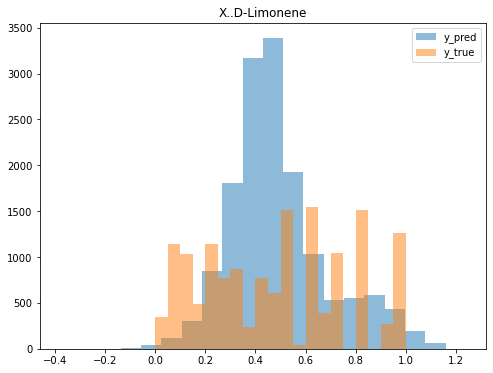

<Figure size 432x288 with 0 Axes>

In [45]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..D-Limonene"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_lsa_elbow_dlim.png')

Pearson R

In [46]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.637
P-value: 0.000


<AxesSubplot:>

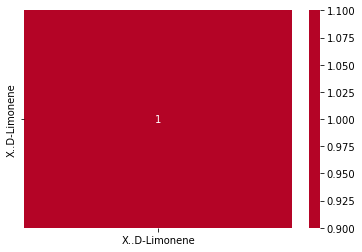

In [47]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)